In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
shop= pd.read_csv('shopping_trends_updated(in).csv')

In [4]:
shop.shape

(3900, 18)

In [5]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
shop.columns 

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
print(f"The unique values of the Gender column {shop['Gender'].unique()}")
print()
print(f"The unique values of the Category column {shop['Category'].unique()}")
print()
print(f"The unique values of the Size column {shop['Size'].unique()}")
print()
print(f"The unique values of the Shipping Type column {shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the Payment Method column {shop['Payment Method'].unique()}")

The unique values of the Gender column ['Male' 'Female']

The unique values of the Category column ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the Size column ['L' 'S' 'M' 'XL']

The unique values of the Shipping Type column ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the Payment Method column ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


1. What is the overall distribution of customer ages in the dataset?

In [11]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [12]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [13]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
shop['Age_Category'] = pd.cut(shop['Age'], bins=[0, 15, 18, 30, 50, 70], 
                               labels=['child', 'teen', 'Young Adult', 'Adult', 'Old'])

fig=px.histogram(shop, x='Age', y='Age_Category')
fig.show()

2. How does the average purchase amount vary across different product categories?

In [15]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [16]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

3. Which gender has the highest number of purchases?

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

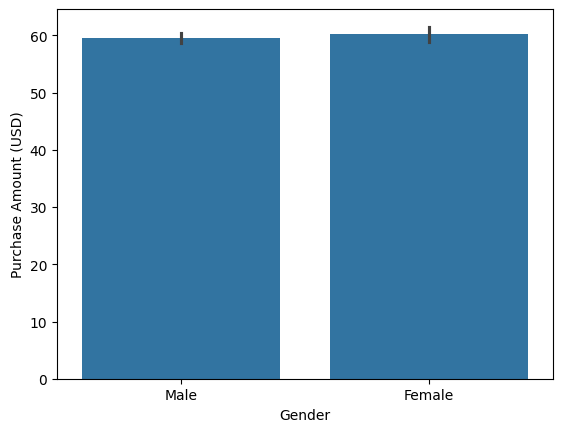

In [17]:
sns.barplot(shop, x='Gender', y='Purchase Amount (USD)')

4. What are the most commonly purchased items in each category?

In [18]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [19]:
fig=px.histogram(shop, x='Item Purchased', color='Category')
fig.show()

5. Are there any seasons or months where customer spending is significantly higher?

In [20]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [21]:
shop['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [22]:
fig=px.histogram(shop, x='Season', range_y=[800, 1000])
fig.show()

6. What is the average rating given by the customers for each product category?

In [23]:
shop_groupby= shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [24]:
fig=px.bar(shop, x='Category', y='Review Rating')
fig.show()

7. Are there notable differences in purchase behaviour between subscribed and non-subscribed customers?

In [25]:
shop['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

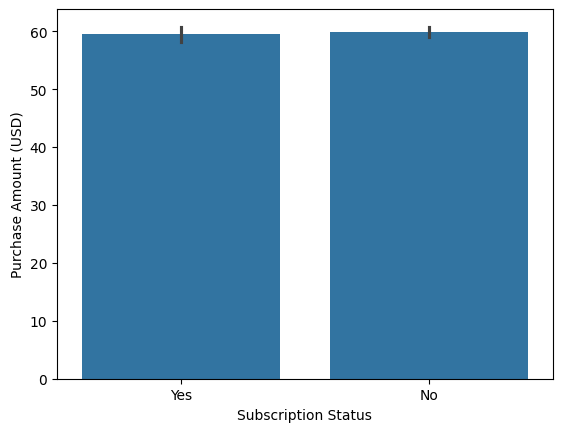

In [26]:
sns.barplot(shop, x='Subscription Status', y='Purchase Amount (USD)')

In [27]:
shop['Purchase Amount (USD)'].sum()

np.int64(233081)

In [28]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

8. Which payment system is most popular among customers?

In [29]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [30]:
shop_groupby=shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [31]:
fig= px.bar(shop_groupby, x='Payment Method', y='Purchase Amount (USD)')
fig.show()

9. Do customers who use promo code tend to spend more than those who don't?

In [32]:
shop_groupby=shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [33]:
fig= px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)')
fig.show()

In [34]:
fig= px.bar(shop_groupby, x='Promo Code Used', y='Purchase Amount (USD)')
fig.show()

10. How does the frequency of purchases vary across different age groups?

In [36]:
shop[['Age', 'Age_Category']]

,Age,Age_Category
0,55,Old
1,19,Young Adult
2,50,Adult
3,21,Young Adult
4,45,Adult
...,...,...
3895,40,Adult
3896,52,Old
3897,46,Adult
3898,44,Adult


In [37]:
shop['Age_Category'].unique()

['Old', 'Young Adult', 'Adult', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adult' < 'Adult' < 'Old']

In [38]:
shop_groupby=shop.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(shop, path=['Frequency of Purchases', 'Age_Category'], values='Age')

11. Are there any correlations between size of product and purchase amount?